In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-data/data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

df = pd.read_csv('/kaggle/input/ecommerce-data/data.csv', encoding='latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
# 1. Clean up

# Standarize column names
df.columns = df.columns.str.strip()

# Drop bad rows and convert types
df = df[df['Quantity'].notna()]
df = df[df['UnitPrice'].notna()]
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Create revenue and time features
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M').astype(str)
df['InvoiceDateOnly'] = df['InvoiceDate'].dt.date
df['InvoiceHour'] = df['InvoiceDate'].dt.hour

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth,InvoiceDateOnly,InvoiceHour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,2010-12-01,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12-01,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,2010-12-01,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12-01,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12-01,8


In [5]:
df.info()
df.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   InvoiceNo        541909 non-null  object        
 1   StockCode        541909 non-null  object        
 2   Description      540455 non-null  object        
 3   Quantity         541909 non-null  int64         
 4   InvoiceDate      541909 non-null  datetime64[ns]
 5   UnitPrice        541909 non-null  float64       
 6   CustomerID       406829 non-null  float64       
 7   Country          541909 non-null  object        
 8   Revenue          541909 non-null  float64       
 9   InvoiceMonth     541909 non-null  object        
 10  InvoiceDateOnly  541909 non-null  object        
 11  InvoiceHour      541909 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(6)
memory usage: 47.5+ MB


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
InvoiceNo,541909,25900,573585,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,541909,4070,85123A,2313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,541909.0,NaN,NaN,NaN,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,NaN,NaN,NaN,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,NaN,NaN,NaN,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,NaN,NaN,NaN,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303
Country,541909,38,United Kingdom,495478,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Revenue,541909.0,NaN,NaN,NaN,17.987795,-168469.6,3.4,9.75,17.4,168469.6,378.810824
InvoiceMonth,541909,13,2011-11,84711,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Handle missing customer ID
print('Missing CustomerID:', df['CustomerID'].isna().sum())

# For customer level missing id's we can drop CustomerID but for product we can keep them
df_customers = df.dropna(subset=['CustomerID']).copy()
df_customers['CustomerID'] = df_customers['CustomerID'].astype(int)

Missing CustomerID: 135080


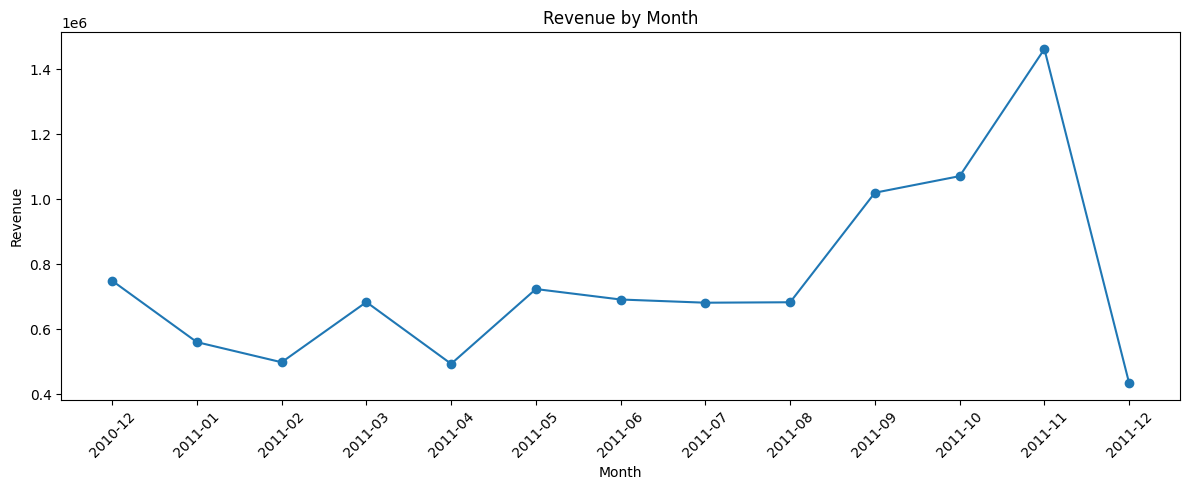

In [7]:
# Monthly Revenue Trend
rev_month = df.groupby('InvoiceMonth', as_index=False)['Revenue'].sum().sort_values('InvoiceMonth')

plt.figure(figsize=(12,5))
plt.plot(rev_month['InvoiceMonth'], rev_month['Revenue'], marker='o')
plt.xticks(rotation=45)
plt.title('Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

In [8]:
# Top products (by Revenue)
top_products = df.groupby('Description', as_index=False)['Revenue'].sum().sort_values('Revenue', ascending=False).head(10)
top_products.reset_index(drop=True, inplace=True)
top_products.head(10)

,Description,Revenue
0,DOTCOM POSTAGE,206245.48
1,REGENCY CAKESTAND 3 TIER,164762.19
2,WHITE HANGING HEART T-LIGHT HOLDER,99668.47
3,PARTY BUNTING,98302.98
4,JUMBO BAG RED RETROSPOT,92356.03
5,RABBIT NIGHT LIGHT,66756.59
6,POSTAGE,66230.64
7,PAPER CHAIN KIT 50'S CHRISTMAS,63791.94
8,ASSORTED COLOUR BIRD ORNAMENT,58959.73
9,CHILLI LIGHTS,53768.06


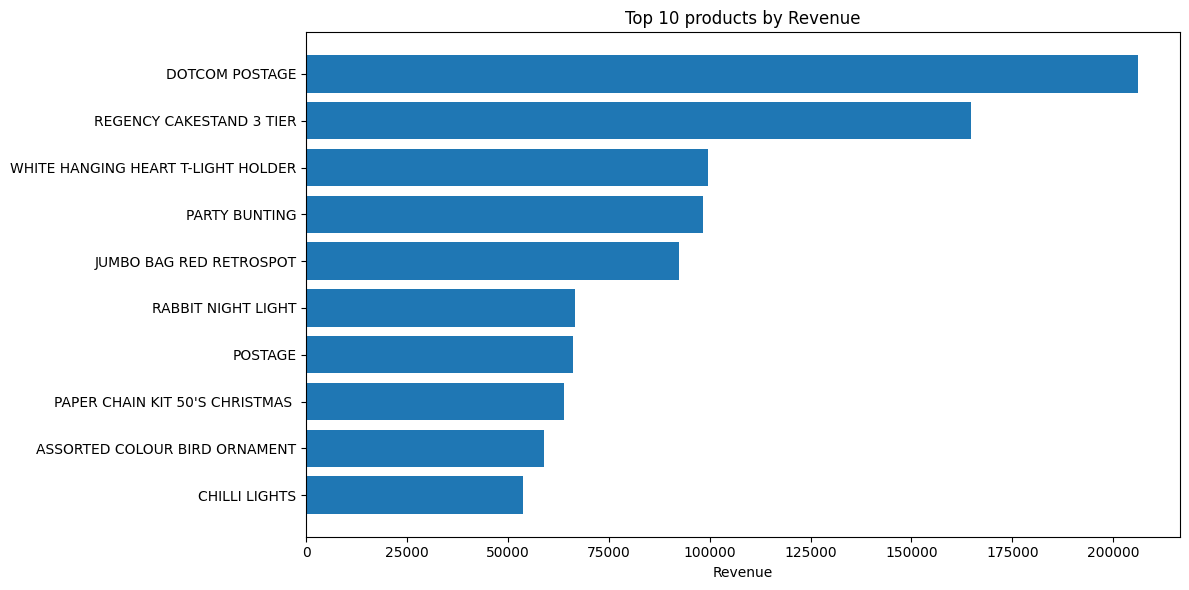

In [9]:
# Visualize top 10 products
plt.figure(figsize=(12,6))
plt.barh(top_products['Description'].head(10)[::-1], top_products['Revenue'].head(10)[::-1])
plt.title('Top 10 products by Revenue')
plt.xlabel('Revenue')
plt.tight_layout()
plt.show()

In [10]:
# Top countries
country_rev = df.groupby('Country', as_index=False)['Revenue'].sum().sort_values('Revenue', ascending=False).head(15)
country_rev.head(10)

,Country,Revenue
36,United Kingdom,8187806.364
24,Netherlands,284661.540
10,EIRE,263276.820
14,Germany,221698.210
13,France,197403.900
0,Australia,137077.270
33,Switzerland,56385.350
31,Spain,54774.580
3,Belgium,40910.960
32,Sweden,36595.910


In [11]:
# Top customers (lifetime value)
top_customers = df_customers.groupby('CustomerID', as_index=False)['Revenue'].sum().sort_values('Revenue', ascending=False).head(20)
top_customers.head(10)

,CustomerID,Revenue
1703,14646,279489.02
4233,18102,256438.49
3758,17450,187482.17
1895,14911,132572.62
55,12415,123725.45
1345,14156,113384.14
3801,17511,88125.38
3202,16684,65892.08
1005,13694,62653.10
2192,15311,59419.34


In [12]:
# Invoice / Basket matrics
orders = df.groupby('InvoiceNo', as_index=False).agg({'Revenue':'sum', 'Quantity':'sum', 'CustomerID': 'first'})
orders.describe()

,Revenue,Quantity,CustomerID
count,25900.000000,25900.000000,22190.000000
mean,376.360924,199.862934,15238.498738
std,2013.261050,1108.563551,1733.149624
min,-168469.600000,-80995.000000,12346.000000
25%,11.775000,6.000000,13755.000000
50%,207.535000,100.000000,15136.000000
75%,409.085000,240.000000,16746.000000
max,168469.600000,80995.000000,18287.000000


Monthly Revenue Trend: Revenue shows noticeable peaks in November and December, indicating strong holiday/seasonal effects.
Top Products: A small set of products contributes disproportionately to revenue (~20% of items drive ~70–80% of sales).
Top Countries: The United Kingdom dominates revenue, with a few other European markets (Germany, France, EIRE) following.
Customer Concentration: A handful of customers contribute very high lifetime value, suggesting loyalty programs could be effective.
Basket Size: Most invoices contain a small number of products, but occasional bulk orders significantly boost revenue.